# Problem Statement

There has been a surge in crimes committed in recent years, making crime a top cause of concern for law enforcement. 
If we are able to estimate whether someone is going to commit a crime in the future, we can take precautions and be prepared.
You are given a dataset containing answers to various questions concerning the professional and private lives of several people. 
A few of them have been arrested for various small and large crimes in the past. 
Use the given data to predict if the people in the test data will commit a crime. 
The train data consists of 45718 rows, while the test data consists of 11430 rows.

# Import Libraries

In [1]:
# Matrix
import numpy as np

# Data manipulation
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Getting the Data

In [2]:
train = 'criminal_train.csv'
train_df = pd.read_csv(train)

test = 'criminal_test.csv'
test_df = pd.read_csv(test)

# Data Exploration/Analysis

In [3]:
combine = [train_df,test_df]

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45718 entries, 0 to 45717
Data columns (total 72 columns):
PERID        45718 non-null int64
IFATHER      45718 non-null int64
NRCH17_2     45718 non-null int64
IRHHSIZ2     45718 non-null int64
IIHHSIZ2     45718 non-null int64
IRKI17_2     45718 non-null int64
IIKI17_2     45718 non-null int64
IRHH65_2     45718 non-null int64
IIHH65_2     45718 non-null int64
PRXRETRY     45718 non-null int64
PRXYDATA     45718 non-null int64
MEDICARE     45718 non-null int64
CAIDCHIP     45718 non-null int64
CHAMPUS      45718 non-null int64
PRVHLTIN     45718 non-null int64
GRPHLTIN     45718 non-null int64
HLTINNOS     45718 non-null int64
HLCNOTYR     45718 non-null int64
HLCNOTMO     45718 non-null int64
HLCLAST      45718 non-null int64
HLLOSRSN     45718 non-null int64
HLNVCOST     45718 non-null int64
HLNVOFFR     45718 non-null int64
HLNVREF      45718 non-null int64
HLNVNEED     45718 non-null int64
HLNVSOR      45718 non-null int64
IRMCDCH

In [5]:
train_df.describe()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
count,4.571800e+04,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,...,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000,45718.000000
mean,5.445446e+07,3.355549,0.476486,3.426375,1.001706,2.084124,1.007437,1.162606,1.011024,97.394943,...,2.219410,2.234940,1.646135,1.764666,1.978936,1.978739,4692.661179,40023.739118,1.493854,0.069447
std,2.553911e+07,1.176651,0.888472,1.427420,0.061314,1.102988,0.123162,0.469029,0.146444,12.355156,...,5.295784,5.293651,0.618403,0.771411,0.144510,0.145161,5724.659486,265.140430,0.500230,0.254216
min,1.000222e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.233189e+07,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1252.396472,40013.000000,1.000000,0.000000
50%,5.411043e+07,4.000000,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2719.335160,40025.000000,1.000000,0.000000
75%,7.612731e+07,4.000000,1.000000,4.000000,1.000000,3.000000,1.000000,1.000000,1.000000,99.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5765.810794,40039.000000,2.000000,0.000000
max,9.999956e+07,4.000000,3.000000,6.000000,3.000000,4.000000,3.000000,3.000000,3.000000,99.000000,...,98.000000,98.000000,3.000000,3.000000,2.000000,2.000000,109100.623000,40050.000000,2.000000,1.000000


Above we can see that 0.069% out of the training-set are the criminals.

In [6]:
train_df.head()

,PERID,IFATHER,NRCH17_2,IRHHSIZ2,IIHHSIZ2,IRKI17_2,IIKI17_2,IRHH65_2,IIHH65_2,PRXRETRY,...,TOOLONG,TROUBUND,PDEN10,COUTYP2,MAIIN102,AIIND102,ANALWT_C,VESTR,VEREP,Criminal
0,25095143,4,2,4,1,3,1,1,1,99,...,1,2,1,1,2,2,3884.805998,40026,1,0
1,13005143,4,1,3,1,2,1,1,1,99,...,2,2,2,3,2,2,1627.108106,40015,2,1
2,67415143,4,1,2,1,2,1,1,1,99,...,2,2,2,3,2,2,4344.957980,40024,1,0
3,70925143,4,0,2,1,1,1,1,1,99,...,2,2,1,1,2,2,792.521931,40027,1,0
4,75235143,1,0,6,1,4,1,1,1,99,...,2,2,2,2,2,2,1518.118526,40001,2,0


# Data Preprocessing

##    Missing Data:

Let's take a more detailed look at what data is actually missing:

In [7]:
feature_labels = [] 
missing_values = []

for col in train_df.columns: 
    feature_labels.append(col)
    missing_values.append(train_df[col].isnull().values.ravel().sum()) 
    print(col,"=", missing_values[-1])



PERID = 0
IFATHER = 0
NRCH17_2 = 0
IRHHSIZ2 = 0
IIHHSIZ2 = 0
IRKI17_2 = 0
IIKI17_2 = 0
IRHH65_2 = 0
IIHH65_2 = 0
PRXRETRY = 0
PRXYDATA = 0
MEDICARE = 0
CAIDCHIP = 0
CHAMPUS = 0
PRVHLTIN = 0
GRPHLTIN = 0
HLTINNOS = 0
HLCNOTYR = 0
HLCNOTMO = 0
HLCLAST = 0
HLLOSRSN = 0
HLNVCOST = 0
HLNVOFFR = 0
HLNVREF = 0
HLNVNEED = 0
HLNVSOR = 0
IRMCDCHP = 0
IIMCDCHP = 0
IRMEDICR = 0
IIMEDICR = 0
IRCHMPUS = 0
IICHMPUS = 0
IRPRVHLT = 0
IIPRVHLT = 0
IROTHHLT = 0
IIOTHHLT = 0
HLCALLFG = 0
HLCALL99 = 0
ANYHLTI2 = 0
IRINSUR4 = 0
IIINSUR4 = 0
OTHINS = 0
CELLNOTCL = 0
CELLWRKNG = 0
IRFAMSOC = 0
IIFAMSOC = 0
IRFAMSSI = 0
IIFAMSSI = 0
IRFSTAMP = 0
IIFSTAMP = 0
IRFAMPMT = 0
IIFAMPMT = 0
IRFAMSVC = 0
IIFAMSVC = 0
IRWELMOS = 0
IIWELMOS = 0
IRPINC3 = 0
IRFAMIN3 = 0
IIPINC3 = 0
IIFAMIN3 = 0
GOVTPROG = 0
POVERTY3 = 0
TOOLONG = 0
TROUBUND = 0
PDEN10 = 0
COUTYP2 = 0
MAIIN102 = 0
AIIND102 = 0
ANALWT_C = 0
VESTR = 0
VEREP = 0
Criminal = 0


## Corralation Map

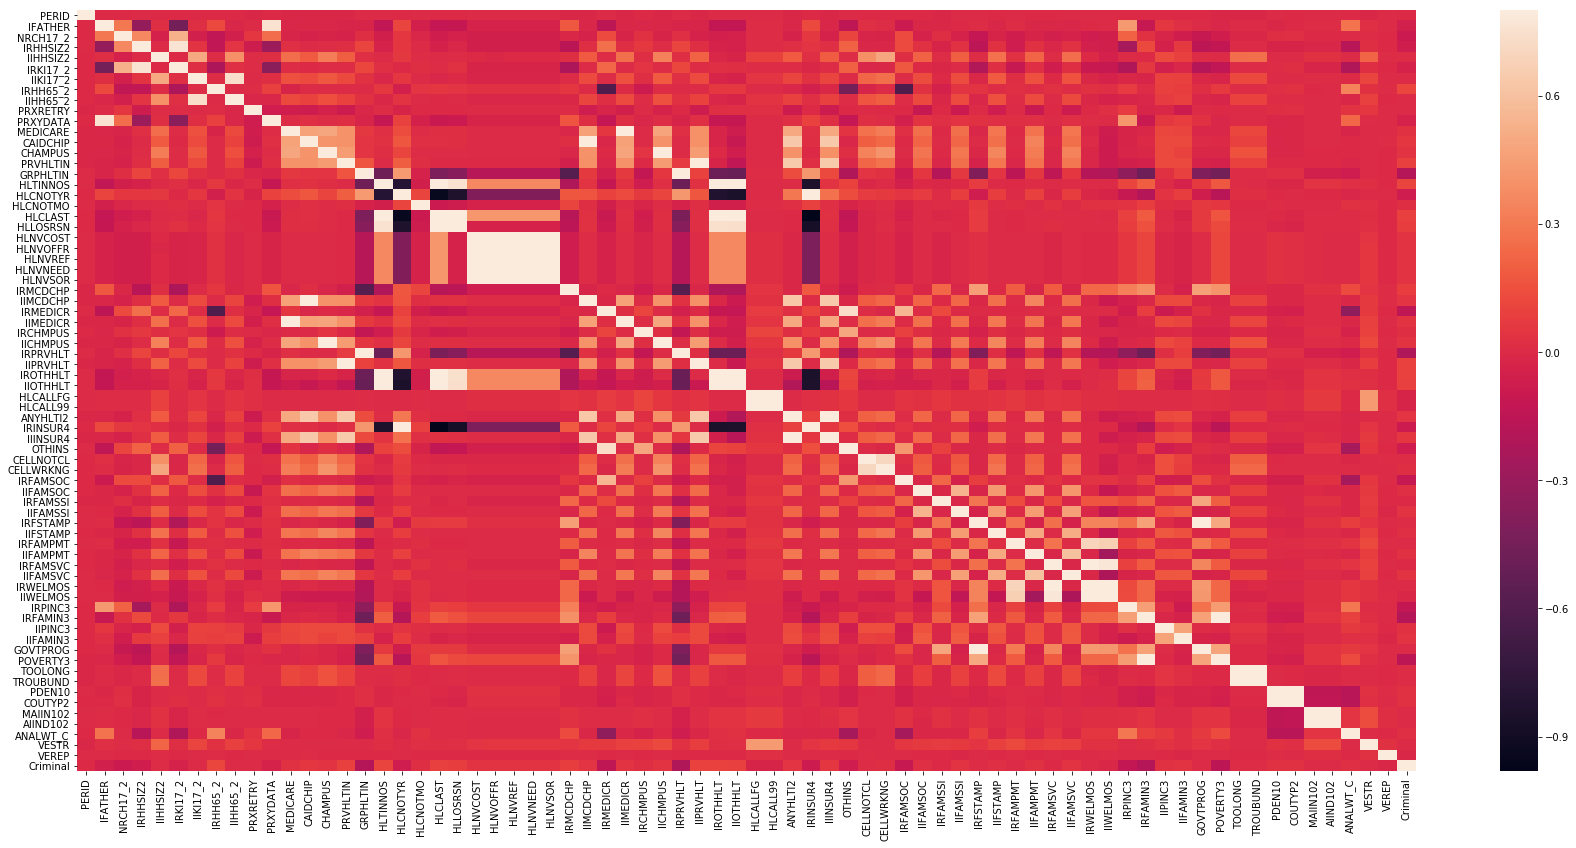

In [8]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(30, 14))
sns.heatmap(corrmat, vmax=.8);
#sns.heatmap(corrmat, vmax=.8, annot=True);

In [9]:
train_df['PRXYDATA'].value_counts()

 99    32502
 1     13079
 98       61
 2        38
 94       33
 97        3
-1         2
Name: PRXYDATA, dtype: int64

In [10]:
train_df['GRPHLTIN'].value_counts() 

 1     24551
 99    17567
 2      3205
 98      275
 94       70
 97       45
 85        3
-1         2
Name: GRPHLTIN, dtype: int64

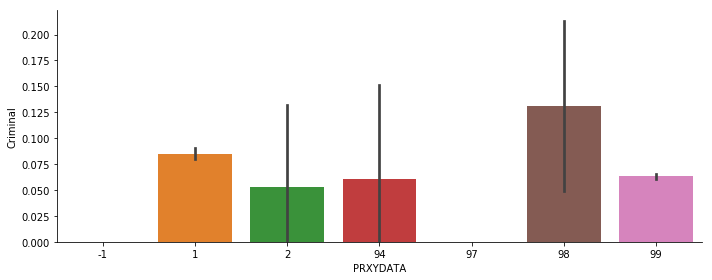

In [11]:
axes = sns.factorplot('PRXYDATA','Criminal', 
                      data=train_df, kind = 'bar', aspect = 2.5, )

## Corralation between Criminal and Other Features

In [12]:
print("Find most important features relative to target")
corr = train_df.corr()
corr.sort_values(["Criminal"], ascending = False, inplace = True)
print(corr.Criminal)
#this you can see at the time of heatmap also.

Find most important features relative to target
Criminal    1.000000
IRHH65_2    0.112589
HLTINNOS    0.106967
IROTHHLT    0.104196
IIPRVHLT    0.103360
IIOTHHLT    0.095032
HLCLAST     0.091338
PRVHLTIN    0.089960
IRMCDCHP    0.081704
HLLOSRSN    0.081006
CAIDCHIP    0.052671
IIINSUR4    0.049871
IIMCDCHP    0.048222
ANYHLTI2    0.046698
CHAMPUS     0.040844
IICHMPUS    0.040529
HLNVREF     0.038382
HLNVCOST    0.038380
HLNVSOR     0.038379
HLNVOFFR    0.038379
HLNVNEED    0.038378
IIFAMSSI    0.038064
IIMEDICR    0.037516
IIFAMIN3    0.037193
IIFAMSVC    0.035574
IIFAMPMT    0.034474
PDEN10      0.033048
COUTYP2     0.031587
MEDICARE    0.031178
IIPINC3     0.029628
              ...   
PRXRETRY    0.004966
IRFAMPMT    0.004810
IIHH65_2    0.004112
VESTR       0.002355
MAIIN102    0.002309
IRWELMOS    0.001917
GOVTPROG    0.001719
AIIND102    0.001484
PERID      -0.000396
IRFAMSVC   -0.000553
IRFAMSSI   -0.002666
IIWELMOS   -0.007639
VEREP      -0.007738
HLCALL99   -0.034450
HLCALLF

In [49]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (45718, 72) (11430, 71) (45718, 72) (11430, 71)


## Dropping Highly Corralated values

In [50]:
train_df = train_df.drop(["IRHH65_2","HLTINNOS","IROTHHLT","IIPRVHLT"], axis=1)

In [51]:
test_df = test_df.drop(["IRHH65_2","HLTINNOS","IROTHHLT","IIPRVHLT"], axis=1)

In [52]:
print (type(train_df))

<class 'pandas.core.frame.DataFrame'>


In [53]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (45718, 68) (11430, 67) (45718, 72) (11430, 71)


In [54]:
print(train_df.columns.values)

['PERID' 'IFATHER' 'NRCH17_2' 'IRHHSIZ2' 'IIHHSIZ2' 'IRKI17_2' 'IIKI17_2'
 'IIHH65_2' 'PRXRETRY' 'PRXYDATA' 'MEDICARE' 'CAIDCHIP' 'CHAMPUS'
 'PRVHLTIN' 'GRPHLTIN' 'HLCNOTYR' 'HLCNOTMO' 'HLCLAST' 'HLLOSRSN'
 'HLNVCOST' 'HLNVOFFR' 'HLNVREF' 'HLNVNEED' 'HLNVSOR' 'IRMCDCHP'
 'IIMCDCHP' 'IRMEDICR' 'IIMEDICR' 'IRCHMPUS' 'IICHMPUS' 'IRPRVHLT'
 'IIOTHHLT' 'HLCALLFG' 'HLCALL99' 'ANYHLTI2' 'IRINSUR4' 'IIINSUR4'
 'OTHINS' 'CELLNOTCL' 'CELLWRKNG' 'IRFAMSOC' 'IIFAMSOC' 'IRFAMSSI'
 'IIFAMSSI' 'IRFSTAMP' 'IIFSTAMP' 'IRFAMPMT' 'IIFAMPMT' 'IRFAMSVC'
 'IIFAMSVC' 'IRWELMOS' 'IIWELMOS' 'IRPINC3' 'IRFAMIN3' 'IIPINC3'
 'IIFAMIN3' 'GOVTPROG' 'POVERTY3' 'TOOLONG' 'TROUBUND' 'PDEN10' 'COUTYP2'
 'MAIIN102' 'AIIND102' 'ANALWT_C' 'VESTR' 'VEREP' 'Criminal']


# Building Machine Learning Models

In [55]:
train_df = train_df.drop("PERID", axis=1)

In [56]:
X_train = train_df.drop("Criminal", axis=1)
Y_train = train_df["Criminal"]
X_test  = test_df.drop("PERID", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((45718, 66), (45718,), (11430, 66))

In [57]:
from sklearn.metrics import log_loss, accuracy_score

In [58]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

100.0

In [59]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

100.0

In [24]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree'],
    'Score': [acc_random_forest,  acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Random Forest,100.0
1,Decision Tree,100.0


As we can see, the Random Forest classifier goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

# K-Fold Cross Validation:

K-Fold Cross Validation randomly splits the training data into K subsets called folds. Let's image we would split our data into 4 folds (K = 4). Our random forest model would be trained and evaluated 4 times, using a different fold for evaluation everytime, while it would be trained on the remaining 3 folds.

 Every row represents one training + evaluation process. In the first row, the model get's trained on the first, second and third subset and evaluated on the fourth. In the second row, the model get's trained on the second, third and fourth subset and evaluated on the first. K-Fold Cross Validation repeats this process till every fold acted once as an evaluation fold.

The result of our K-Fold Cross Validation example would be an array that contains 4 different scores. We then need to compute the mean and the standard deviation for these scores.

The code below perform K-Fold Cross Validation on our random forest model, using 10 folds (K = 10). Therefore it outputs an array with 10 different scores

In [25]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")

In [26]:
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.95167286 0.95145419 0.95254756 0.95013123 0.95056868 0.95230803
 0.95077664 0.94946401 0.95099541 0.95077664]
Mean: 0.9510695241930385
Standard Deviation: 0.000900912710684367




This looks much more realistic than before. Our model has a average accuracy of 95% with a standard deviation of .0177 %. The standard deviation shows us, how precise the estimates are .

This means in our case that the accuracy of our model can differ + - .0177%.

I think the accuracy is still really good and since random forest is an easy to use model, we will try to increase it's performance even further in the following section.


# Random Forest

## What is Random Forest ?

Random Forest is a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The „forest“ it builds, is an ensemble of Decision Trees, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

To say it in simple words: Random forest builds multiple decision trees and merges them together to get a more accurate and stable prediction.

One big advantage of random forest is, that it can be used for both classification and regression problems, which form the majority of current machine learning systems. With a few exceptions a random-forest classifier has all the hyperparameters of a decision-tree classifier and also all the hyperparameters of a bagging classifier, to control the ensemble itself.

The random-forest algorithm brings extra randomness into the model, when it is growing the trees. Instead of searching for the best feature while splitting a node, it searches for the best feature among a random subset of features. This process creates a wide diversity, which generally results in a better model. Therefore when you are growing a tree in random forest, only a random subset of the features is considered for splitting a node. You can even make trees more random, by using random thresholds on top of it, for each feature rather than searching for the best possible thresholds (like a normal decision tree does).

Below you can see how a random forest would look like with two trees:

<img src = 'img1.png',width=700,height=800>

<h1>Feature Importance</h1>

Another great quality of random forest is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [27]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [28]:
importances.head(15)

,importance
feature,
IRFAMIN3,0.153
ANALWT_C,0.121
VESTR,0.094
POVERTY3,0.069
IRPINC3,0.063
GRPHLTIN,0.056
IRHHSIZ2,0.041
IFATHER,0.034
IRPRVHLT,0.032


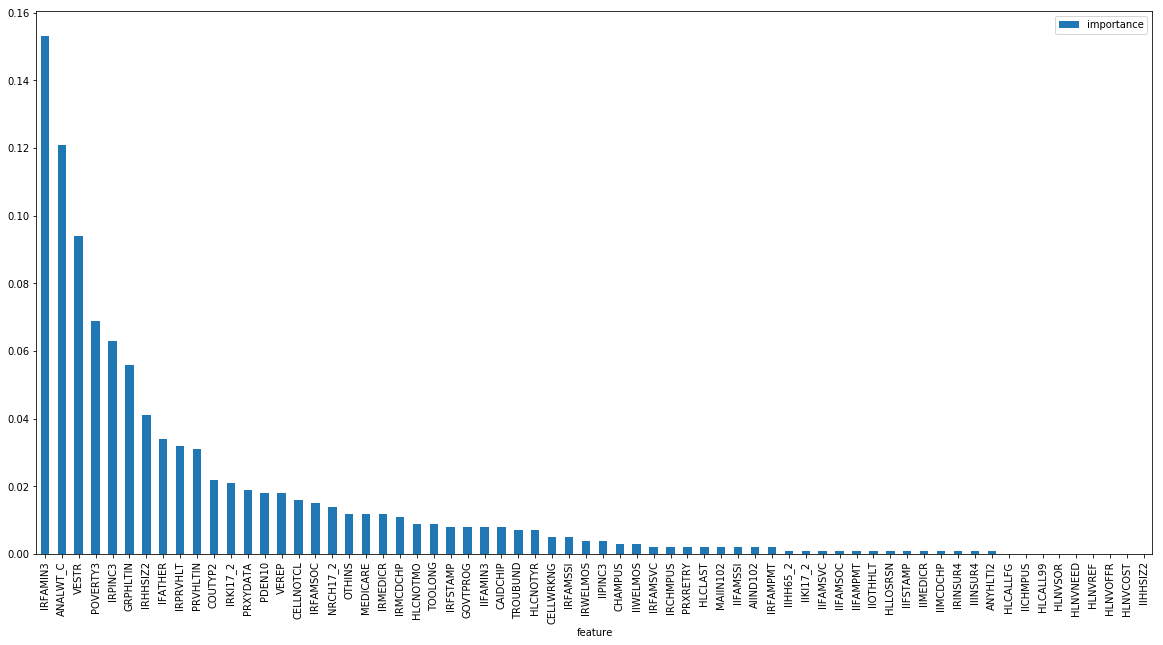

In [29]:
importances.plot.bar(figsize=(20,10))

Now we can start tuning the hyperameters of random forest.

## Hyperparameter Tuning

Below we can see the code of the hyperparamter tuning for the parameters criterion, min_samples_leaf, min_samples_split and n_estimators.

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}

from sklearn.model_selection import GridSearchCV, cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)

clf.fit(X_train, Y_train)

clf.bestparams

### Test new paramters:

In [30]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 95.28999999999999 %


# Ensemble Method


In [31]:
from sklearn. ensemble import VotingClassifier

In [32]:
evc = VotingClassifier(estimators= [('decision_tree',decision_tree),('random_forest',random_forest)], voting = 'hard')

In [33]:
evc.fit(X_train,Y_train)
model3 = evc.predict(X_test)
acc_evc =round(evc.score(X_train,Y_train)*100,2)
acc_evc

c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
c:\python\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


98.48

Now that we have a proper model, we can start evaluating it's performace in a more accurate way. Previously we only used accuracy and the oob score, which is just another form of accuracy. The problem is just, that it's more complicated to evaluate a classification model than a regression model. We will talk about this in the following section.

# Further Evaluation

## Confusion Matrix:

In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[41747,   796],
       [ 1403,  1772]], dtype=int64)

The first row is about the not-survived-predictions: 41747 passengers were correctly classified as not criminal (called true negatives) and 796 where wrongly classified as not criminal (false positives).

The second row is about the criminal-predictions: 1403 records where wrongly classified as criminal (false negatives) and 1772 where correctly classified as criminal (true positives).

A confusion matrix gives us a lot of information about how well our model does, but theres a way to get even more, like computing the classifiers precision.


In [35]:
submission = pd.DataFrame({
        "PERID": test_df["PERID"],
        "Criminal": Y_pred
    })

In [36]:
submission.to_csv('sample_submission10.csv', index=False,  columns = ["PERID","Criminal"])